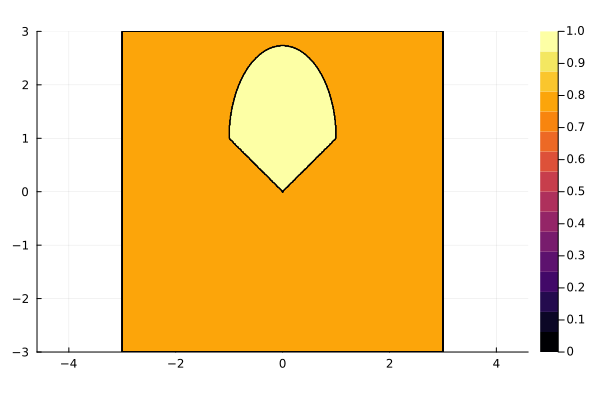

In [21]:
using LinearAlgebra  Plots

function val1(xy)
    A = [ 0 -1 1 ]
    P = [ x y 0]
    dot(A P) / norm(A2) / norm(P2)
end

function val2(xy)
    A = [ 0 -1 1 ]
    P = [ x y 0]
    dot(-A, P-A) / norm(-A,2) / norm(P-A,2)
end

function f(x,y)
    if x == y == 0
        return 0
    elseif val1(x,y) <= -1/2 && sqrt(3)/2 <= val2(x,y) 
        return 1
    else 0.8
    end
end

contour(-3:0.01:3 , -3:0.01:3 ,f,fill=true,aspectratio=true)


In [41]:
using QuadGK , Plots

f2(x) = quadgk(t -> abs(t-x)/(1+t^2), 0, 1)[1]

plot(0:.01:1,f2)

using Optim

optimize(f2, 0.0, 1.0) |> Optim.minimizer

optimize(f2, 0.0, 1.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 1.000000]
 * Minimizer: 4.142249e-01
 * Minimum: 1.882264e-01
 * Iterations: 27
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 28

In [1]:
log10(5^28+4^28)

17.634953051861842

In [2]:
log10(5^29+4^29)

18.319169493363685

In [13]:
28*log10(5),27*log10(5)

(19.57116012140853, 18.87219011707251)

In [6]:
19/0.7

27.142857142857146

In [9]:
log10(2)

0.3010299956639812

In [48]:
A = 1//6* [
    0 1 0 2 0 1 0 2
    1 0 2 0 1 0 2 0
    0 2 0 1 0 2 0 1
    2 0 1 0 2 0 1 0
    0 1 0 2 0 1 0 2
    1 0 2 0 1 0 2 0
    0 2 0 1 0 2 0 1
    2 0 1 0 2 0 1 0
    ]

X = [
  1
  0
  0
  0
  0
  0
  0
  0
]

8-element Vector{Int64}:
 1
 0
 0
 0
 0
 0
 0
 0

In [49]:
A*X

8-element Vector{Rational{Int64}}:
  0
 1//6
  0
 1//3
  0
 1//6
  0
 1//3

In [54]:
function f(n)
    A = 1//6* [
    0 1 0 2 0 1 0 2
    1 0 2 0 1 0 2 0
    0 2 0 1 0 2 0 1
    2 0 1 0 2 0 1 0
    0 1 0 2 0 1 0 2
    1 0 2 0 1 0 2 0
    0 2 0 1 0 2 0 1
    2 0 1 0 2 0 1 0
    ]

    X = [
    1
    0
    0
    0
    0
    0
    0
    0
    ]

    if n == 1
        return X[1]
    else
        for i = 1:n-1
            X = A*X
        end
        return X[1]
    end
end

for j = 1:10
    println("n=$j のとき，確率は",f(j))
end


n=1 のとき，確率は1
n=2 のとき，確率は0//1
n=3 のとき，確率は5//18
n=4 のとき，確率は0//1
n=5 のとき，確率は41//162
n=6 のとき，確率は0//1
n=7 のとき，確率は365//1458
n=8 のとき，確率は0//1
n=9 のとき，確率は3281//13122
n=10 のとき，確率は0//1


In [1]:
using MathLink
W`Integrate[t, {t,0,1}]`


W`Integrate[t, List[t, 0, 1]]`

In [1]:
using Zygote

ArgumentError: ArgumentError: Package Zygote not found in current path.
- Run `import Pkg; Pkg.add("Zygote")` to install the Zygote package.

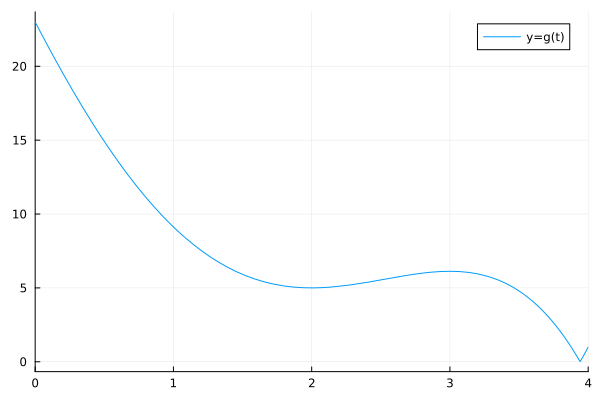

In [26]:
using Zygote , Plots , Optim
    f(x) = -sqrt(2)/4 *x^2+4*sqrt(2)
    c(t) = f(t)*f'(t)+t
    r(t) = sqrt((t-c(t))^2+f(t)^2)
    g(t) = abs(r(t)^2-(3-c(t))^2)

    plot(g,label="y=g(t)",xlim=(0,4))

In [23]:
optimize(g, 0 , 2.5)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 2.500000]
 * Minimizer: 2.000000e+00
 * Minimum: 2.236068e+00
 * Iterations: 16
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 17

In [ ]:
optimize(x->-g(x), 2.5 , 3.5)

In [10]:
f(x) = (x[1] + 2.0)^2 + 1
x0 = [5.0]
optimize(f, x0, method=GradientDescent())

 * Status: success

 * Candidate solution
    Final objective value:     1.000000e+00

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 7.00e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.50e+00 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.90e+01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.90e+01 ≰ 0.0e+00
    |g(x)|                 = 9.17e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   3


In [3]:
rosenbrock(x) =  (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2

result = optimize(rosenbrock, zeros(2), BFGS())

 * Status: success

 * Candidate solution
    Final objective value:     5.471417e-17

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.47e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.47e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.59e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.20e+03 ≰ 0.0e+00
    |g(x)|                 = 2.33e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    16
    f(x) calls:    53
    ∇f(x) calls:   53


In [32]:
g(4)

-1.0

In [11]:
1.000000e+01

10.0

In [34]:
anim = Animation()
for i in 1:10
    plt = plot(t->sinpi(t+i/5), range(0, 2, length=100))
    frame(anim, plt)
end
   

$\begin{pmatrix} 1 \\ 2\\ 3\end{pmatrix}$

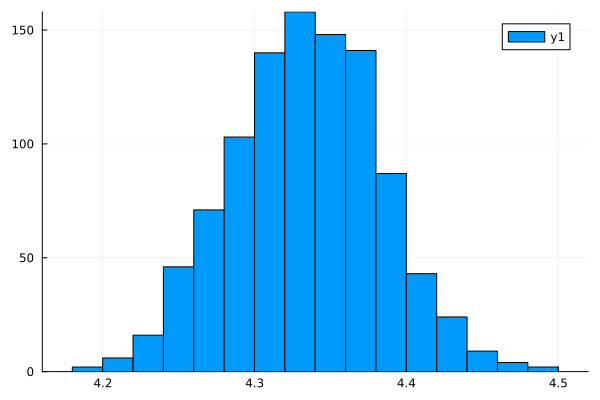

In [64]:
using Statistics

A = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6]

B=[]
for j=1:1000
    append!(B,mean(rand(A) for i=1:1000))
end

histogram(B)

平均を取る。5回

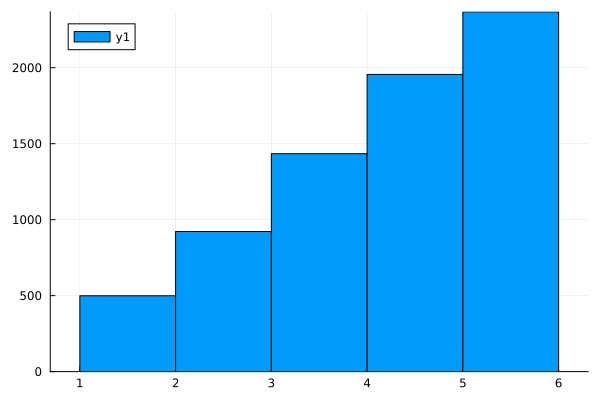

In [67]:

A = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6]

B=[]
append!(B,rand(A) for i=1:10000)

histogram(B,bin=range(1, 6, step=1))

In [53]:
using StatsPlots, Distributions

In [62]:
d = Normal(1.94,0.65)

quantile(d,0.975)-quantile(d,0.025)

2.547953179902076

In [9]:
using Plots

plotlyjs()
    f(x,y) = 1 - x - y
    plot(0:0.1:1,0:0.1:1,f)

UndefVarError: UndefVarError: `plot` not defined

┌ Warning: attempting to remove probably stale pidfile
│   path = /Users/shimizudan/.jlassetregistry.lock
└ @ Pidfile /Users/shimizudan/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


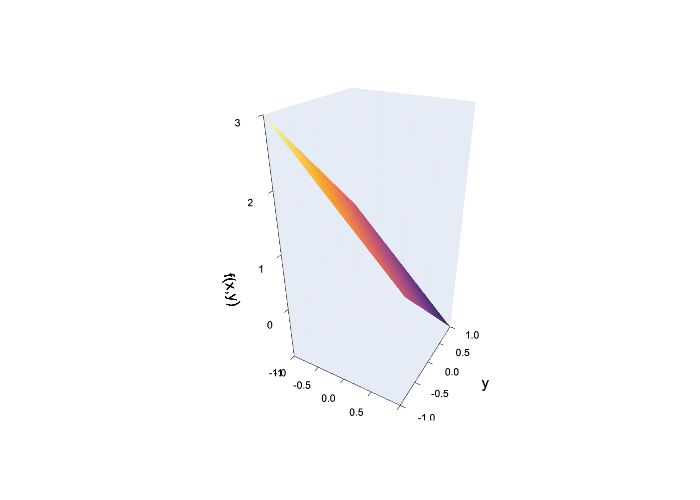

In [1]:
using Plots
plotlyjs()
f(x, y) = 1-x-y
surface(-1:0.01:1,-1:0.01:1, f,colorbar=false, alpha=0.9 ,xlabel = "x", ylabel = "y", zlabel = "f(x,y)")

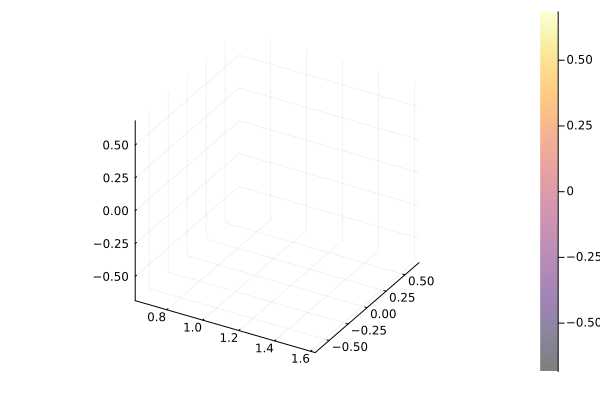

 ***   ALL COLLINEAR DATA POINTS.
   NDP =   63
 ERROR DETECTED IN ROUTINE   IDTANG.
points not sorted in ascending order
 ***   ALL COLLINEAR DATA POINTS.
   NDP =   63
 ERROR DETECTED IN ROUTINE   IDTANG.
points not sorted in ascending order
 ***   ALL COLLINEAR DATA POINTS.
   NDP =   63
 ERROR DETECTED IN ROUTINE   IDTANG.
points not sorted in ascending order


In [12]:
using Plots,LinearAlgebra
# plotlyjs()
A = [1,0,0]
B = [0,1,0]
C = [0,0,1] 
f(s,t) = A+(s/2 *(C-A)+(1-s)*(B-A))*t

g(s,t,θ) = [f(s,t)[1],norm(f(s,t),2)*cos(θ),norm(f(s,t),2)*sin(θ)]
# s = t = 0:0.01:1
# θ = 0:0.01:2π

f(0.5,0.5)



g(0.5,0.5,0.23)

xs=[]
ys=[]
zs=[]
for θ = 0:0.1:2π
    Q = g(.5,.5,θ)
    append!(xs,Q[1])
    append!(ys,Q[2])
    append!(zs,Q[3])
end

# # xs,ys,zs = [[p[i] for p in f.(s, t')] for i in 1:3]
surface(xs,ys,zs,alpha=.5)

In [9]:
using AbstractPlotting, GLMakie
r1, r2 = 2, 1/2
r(u,v) = ((r1 + r2*cos(v))*cos(u), (r1 + r2*cos(v))*sin(u), r2*sin(v)) # torus
us = vs = range(0, 2pi, length=25)
xs, ys, zs = [[pt[i] for pt in r.(us, vs')] for i in 1:3]
surface(xs, ys, zs)

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.10/Project.toml`
  [41fe7b60] + Unzip v0.2.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [11]:
using Plots,Unzip
F(u,v)  =  [cos(u)*sin(v),  sin(u)*sin(v), cos(v)]
vs =  us = range(0,2pi, length=100)
surface(unzip(F.(us, vs')))

MethodError: MethodError: no method matching tail(::Vector{Float64})

Closest candidates are:
  tail(!Matched::Tuple{})
   @ Base essentials.jl:375
  tail(!Matched::NamedTuple{names}) where names
   @ Base namedtuple.jl:383
  tail(!Matched::Tuple)
   @ Base essentials.jl:374


In [13]:
A = [1,0,0]; B = [0,1,0]; C = [0,0,1]; 
f(s,t) = A+s/2 *(C-A)+t*(B-A)



surface(0:0.1:1,0:0.1:1, f)

MethodError: MethodError: Cannot `convert` an object of type Vector{Float64} to an object of type Float64

Closest candidates are:
  convert(::Type{Float64}, !Matched::Measures.AbsoluteLength)
   @ Measures ~/.julia/packages/Measures/PKOxJ/src/length.jl:12
  convert(::Type{T}, !Matched::T) where T<:Number
   @ Base number.jl:6
  convert(::Type{T}, !Matched::T) where T
   @ Base Base.jl:84
  ...
